In [1]:
#Imports
%matplotlib inline

#Imports
import pynbody
SimArray = pynbody.array.SimArray
from matplotlib.pylab import *
import matplotlib.pylab as plt
import pynbody.plot.sph as sph
import numpy as np
from scipy import interpolate
import matplotlib.lines as mlines
import matplotlib.colors
from matplotlib.pyplot import figure, show, rc

#Tell notebook where my diskpy distribution is (the lazy way)
import os
sys.path.append('/astro/users/dflemin3/Desktop/diskpy')
sys.path.append('/astro/users/dflemin3/Desktop')

import diskpy
from diskpy.ICgen import *

#Typical plot parameters that make for pretty plots
plt.rcParams['figure.figsize'] = (10,6)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

# Plot e vs time for 60 yr evolution for big gap/normal sims

In [9]:
time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

e_lowEcc_bigGap = np.asarray([  4.52803861e-05,   2.45573304e-04,   4.69736092e-04,
         2.68364700e-04,   1.79744275e-04,   1.05732059e-04,
         1.71159030e-04,   2.10244291e-04,   1.94495198e-04,
         3.24121134e-04,   3.87524993e-04,   1.72394517e-04,
         2.52925096e-04,   3.22700168e-04,   3.03042373e-04,
         2.19171724e-04,   1.85476318e-04,   3.61226381e-04,
         8.74058917e-05,   2.98175692e-04,   3.06379536e-04,
         1.70930639e-04,   2.78657879e-04,   4.38658283e-04,
         5.43766188e-04,   3.86551607e-04,   5.56159986e-05,
         3.04716669e-04,   6.23380957e-04,   5.95841627e-04,
         3.90495043e-04,   2.03253756e-04,   4.05583906e-04,
         6.44117930e-04,   7.31541451e-04,   6.19401581e-04,
         2.81526865e-04,   3.23813864e-04,   6.06009174e-04,
         8.06805000e-04,   6.95460432e-04,   3.56217256e-04,
         4.11606424e-04,   6.95362710e-04,   6.68344076e-04,
         2.94707517e-04,   6.48362931e-05,   2.43751927e-04,
         4.21510562e-04,   4.74326231e-04,   4.01090375e-04,
         1.14350060e-04,   1.79264223e-04,   2.78350154e-04,
         4.41222650e-04,   5.09880030e-04,   3.44878276e-04,
         9.70123697e-05,   5.70192801e-04,   7.54087489e-04,
         6.62095845e-04,   4.31687203e-04,   4.18042255e-04,
         7.50146890e-04,   8.38301413e-04,   7.42780406e-04,
         4.03249130e-04,   3.37316900e-04,   6.99446800e-04,
         7.81425350e-04,   6.10674290e-04,   4.09031728e-04,
         7.82902470e-04,   9.66874643e-04,   8.27842166e-04,
         5.46986594e-04,   4.75534215e-04,   8.26196396e-04,
         8.64706224e-04,   7.75239160e-04,   5.14731152e-04,
         5.30428021e-04,   7.59383639e-04,   8.11659284e-04,
         7.96918788e-04,   4.00820308e-04,   6.47859310e-04,
         8.82964583e-04,   8.69537158e-04,   6.17759918e-04,
         5.00683850e-04,   7.87333195e-04,   9.53757017e-04,
         8.86237603e-04,   5.70682452e-04,   5.58862731e-04,
         1.03456632e-03,   1.28719802e-03,   1.11452040e-03,
         9.94415302e-04,   1.11837893e-03,   1.33541750e-03,
         1.45818236e-03,   1.22954093e-03,   9.64737460e-04,
         1.26240195e-03,   1.38633984e-03,   1.29597241e-03,
         1.02197363e-03,   9.97363085e-04,   1.23158905e-03,
         1.31357844e-03,   1.18971139e-03,   9.24200255e-04,
         8.38610191e-04,   1.06245163e-03,   1.10775050e-03,
         8.46983573e-04,   6.57307101e-04,   8.34209244e-04,
         1.03861337e-03,   1.02049866e-03,   8.09974707e-04,
         7.08546803e-04,   9.20585391e-04,   1.04679919e-03,
         1.09761270e-03,   8.74774803e-04,   7.63495250e-04,
         9.68410380e-04,   1.15102006e-03,   9.77480972e-04,
         6.66575935e-04,   9.46470941e-04,   1.24252414e-03,
         1.37121557e-03,   1.21684267e-03,   1.03750872e-03,
         1.23633295e-03,   1.35181906e-03,   1.27475718e-03,
         1.02890853e-03,   1.01990340e-03,   1.32556513e-03,
         1.51437921e-03,   1.44622082e-03,   1.11700696e-03,
         1.09882958e-03,   1.26288888e-03,   1.30307388e-03,
         1.12290415e-03,   8.50729507e-04,   9.37659633e-04,
         1.12457615e-03,   1.19254791e-03,   9.13814218e-04,
         6.02665584e-04,   6.84549511e-04,   1.07337045e-03,
         1.19868001e-03,   1.01644938e-03,   8.92260026e-04,
         1.11174102e-03,   1.44345468e-03,   1.41821109e-03,
         1.20751009e-03,   1.22673043e-03,   1.55724694e-03,
         1.74068777e-03,   1.68926051e-03,   1.41819581e-03,
         1.51391533e-03,   1.79776318e-03,   1.80396645e-03,
         1.65678801e-03,   1.47602842e-03,   1.60068538e-03,
         1.76730082e-03,   1.67361487e-03,   1.44466793e-03,
         1.33867775e-03,   1.54365778e-03,   1.72429562e-03,
         1.57310775e-03,   1.21316212e-03,   1.26037622e-03,
         1.55185398e-03,   1.71326938e-03,   1.62510337e-03,
         1.39665022e-03,   1.52411365e-03,   1.80608707e-03,
         1.89404443e-03,   1.81632825e-03,   1.48604346e-03,
         1.56292209e-03,   1.88433486e-03,   1.99533318e-03,
         1.87148685e-03])

e_control_bigGap = [ 0.10324994,  0.10306494,  0.10283977,  0.10298124,  0.10324202,
        0.10333326,  0.10310695,  0.10289022,  0.10309002,  0.10336959,
        0.10324487,  0.10297479,  0.10292824,  0.10314039,  0.10344322,
        0.10338116,  0.10319136,  0.103146  ,  0.10351512,  0.10367398,
        0.10344472,  0.1031865 ,  0.10327281,  0.10363625,  0.10372585,
        0.10336982,  0.10321595,  0.10340971,  0.10366532,  0.10341567,
        0.10318993,  0.10317001,  0.10332517,  0.10342045,  0.1032109 ,
        0.10300592,  0.10301524,  0.10335351,  0.10354563,  0.10325472,
        0.10307622,  0.10326393,  0.10366705,  0.10366136,  0.10356791,
        0.10351236,  0.10382393,  0.10413652,  0.10409595,  0.1039575 ,
        0.10402814,  0.10428129,  0.10447269,  0.10423382,  0.10400415,
        0.10401801,  0.10431965,  0.10427964,  0.10401897,  0.10401142,
        0.10422476,  0.10465953,  0.10458287,  0.1045869 ,  0.10464821,
        0.10491788,  0.10508531,  0.10483784,  0.10475751,  0.10505693,
        0.10527918,  0.10524195,  0.10505924,  0.10517898,  0.1056494 ,
        0.10595597,  0.1058344 ,  0.10571619,  0.10576587,  0.10602245,
        0.1062854 ,  0.10599576,  0.10589744,  0.10611844,  0.10649044,
        0.10643727,  0.10641483,  0.10646833,  0.10666038,  0.10688873,
        0.10662632,  0.10636348,  0.10659232,  0.10696658,  0.1069755 ,
        0.10668568,  0.10676894,  0.10696759,  0.1072688 ,  0.10699061,
        0.10679675,  0.10701974,  0.10739864,  0.10731665,  0.10708051,
        0.10716418,  0.10754901,  0.10788706,  0.10773838,  0.10765371,
        0.10783611,  0.10817432,  0.10815883,  0.10778829,  0.10789308,
        0.10817401,  0.10858568,  0.10851704,  0.10834854,  0.10841188,
        0.10874851,  0.10881116,  0.10857554,  0.10853771,  0.10872364,
        0.10905561,  0.10898925,  0.10888664,  0.10898055,  0.10925995,
        0.10920379,  0.10890895,  0.10878771,  0.10911985,  0.10953519,
        0.10942659,  0.10919878,  0.10927943,  0.10982277,  0.10977131,
        0.1095289 ,  0.10953183,  0.10981578,  0.11002498,  0.10973971,
        0.10966981,  0.10972642,  0.11007021,  0.11000038,  0.10972325,
        0.10969054,  0.10994164,  0.11006603,  0.10984698,  0.10979507,
        0.11001302,  0.11037469,  0.11043497,  0.11018673,  0.11043644,
        0.11089339,  0.11106375,  0.11086232,  0.11076648,  0.11111469,
        0.11138592,  0.11114458,  0.11096386,  0.11115225,  0.11158087,
        0.11167778,  0.1114338 ,  0.11145508,  0.11180328,  0.11202159,
        0.11181077,  0.11165371,  0.11182159,  0.11226389,  0.11231575,
        0.11213294,  0.11220981,  0.11250858,  0.11277676,  0.11258573,
        0.11266878,  0.11305515,  0.11333966,  0.11304639,  0.11281687,
        0.11310809,  0.11356664,  0.11355379,  0.1133082 ,  0.11350588,
        0.11382297,  0.11387573,  0.11362455,  0.11359189]

e_lowEcc_bigGap += e_control_bigGap[0] - e_lowEcc_bigGap

e_lowEcc = np.asarray([  4.52803861e-05,   3.96806828e-04,   2.93230620e-04,
         2.48721514e-04,   1.01523667e-04,   1.07260373e-04,
         4.04009980e-04,   9.13511586e-04,   1.07514640e-03,
         1.06872298e-03,   1.56071257e-03,   2.17929227e-03,
         2.44936360e-03,   2.20320504e-03,   2.29621843e-03,
         2.62494317e-03,   3.02722348e-03,   2.76737588e-03,
         2.58265805e-03,   2.73682576e-03,   2.93315984e-03,
         2.73217191e-03,   2.41508819e-03,   2.35888850e-03,
         2.50772071e-03,   2.28550443e-03,   1.82893864e-03,
         1.40402633e-03,   1.53046127e-03,   1.52617139e-03,
         1.30697998e-03,   9.05314200e-04,   1.01840484e-03,
         1.01669146e-03,   6.66608867e-04,   5.45238577e-04,
         7.68272287e-04,   9.28817346e-04,   6.26737197e-04,
         5.89399487e-04,   1.14382342e-03,   1.43225361e-03,
         1.19602348e-03,   1.37672664e-03,   1.93592734e-03,
         2.34397865e-03,   2.34007606e-03,   2.16559151e-03,
         2.33099867e-03,   2.76102983e-03,   2.99404189e-03,
         2.95340143e-03,   2.85699244e-03,   3.24660638e-03,
         3.56575664e-03,   3.49821882e-03,   3.21540691e-03,
         3.21699959e-03,   3.41863157e-03,   3.51353759e-03,
         3.17206833e-03,   2.88324288e-03,   2.89947460e-03,
         3.15394579e-03,   3.04181568e-03,   2.59074664e-03,
         2.20394706e-03,   2.21301835e-03,   2.12336651e-03,
         1.85613565e-03,   1.43960064e-03,   1.19582907e-03,
         1.32146396e-03,   1.16247595e-03,   7.45479554e-04,
         3.11341758e-04,   2.60201172e-04,   4.10332461e-04,
         5.60669952e-04,   7.98878349e-04,   7.89147153e-04,
         6.72431177e-04,   7.58855709e-04,   1.25033121e-03,
         1.65168761e-03,   1.72304921e-03,   1.58540453e-03,
         1.72292439e-03,   2.04955034e-03,   2.26374838e-03,
         2.30284704e-03,   2.26086444e-03,   2.57111576e-03,
         3.03766121e-03,   3.18782686e-03,   2.98255182e-03,
         2.93530252e-03,   3.22337828e-03,   3.53101633e-03,
         3.45525454e-03,   3.34440709e-03,   3.33547873e-03,
         3.67490951e-03,   3.78420218e-03,   3.52754893e-03,
         3.33834020e-03,   3.35819387e-03,   3.59912238e-03,
         3.53065532e-03,   3.23187274e-03,   2.94630383e-03,
         2.98224304e-03,   2.96622338e-03,   2.73538733e-03,
         2.34809189e-03,   2.06479008e-03,   2.03059132e-03,
         2.01057838e-03,   1.66744830e-03,   1.14140263e-03,
         1.03654161e-03,   1.12471702e-03,   9.96339808e-04,
         7.18453506e-04,   3.56826682e-04,   1.88146809e-04,
         2.38207506e-04,   4.92423899e-04,   7.53290976e-04,
         9.32335904e-04,   1.03179032e-03,   9.33314533e-04,
         1.28949123e-03,   1.72302276e-03,   1.87728176e-03,
         1.68375469e-03,   1.75907311e-03,   2.13704272e-03,
         2.33472310e-03,   2.29548692e-03,   2.17069625e-03,
         2.16414587e-03,   2.47527895e-03,   2.64571821e-03,
         2.57948482e-03,   2.41626102e-03,   2.37676350e-03,
         2.85500199e-03,   2.99453706e-03,   2.84416479e-03,
         2.70671702e-03,   2.88434005e-03,   3.17198576e-03,
         3.11864640e-03,   2.69007116e-03,   2.40147773e-03,
         2.46258250e-03,   2.68497158e-03,   2.48953158e-03,
         2.12573487e-03,   2.05710426e-03,   2.09930267e-03,
         2.18620615e-03,   1.94245325e-03,   1.48419702e-03,
         1.23775653e-03,   1.31366492e-03,   1.31227223e-03,
         1.02910262e-03,   6.34801833e-04,   3.40940593e-04,
         4.03428888e-04,   5.90535095e-04,   7.63684719e-04,
         6.68438172e-04,   5.74353761e-04,   6.29012008e-04,
         9.06315154e-04,   1.38035783e-03,   1.55041299e-03,
         1.58367358e-03,   1.49114605e-03,   1.83086375e-03,
         2.19303544e-03,   2.36651535e-03,   2.28215907e-03,
         2.19163711e-03,   2.49382279e-03,   2.91398637e-03,
         2.89525423e-03,   2.69754893e-03,   2.69748044e-03,
         2.95646371e-03,   3.23411161e-03,   3.19598422e-03,
         2.98729026e-03,   2.96989890e-03,   3.17370890e-03,
         3.31388222e-03])

e_lowEcc += e_control_bigGap[0] - e_lowEcc[0]

e_control = [ 0.10324994,  0.103141  ,  0.10307302,  0.10339904,  0.10399959,
        0.10432266,  0.10422725,  0.10425606,  0.10464416,  0.10504451,
        0.10511097,  0.1050031 ,  0.10493263,  0.10516426,  0.10540017,
        0.10511819,  0.10498205,  0.10514528,  0.10545745,  0.10566215,
        0.10540133,  0.10533541,  0.10563949,  0.10613556,  0.10634381,
        0.10615158,  0.10618871,  0.10666292,  0.10710376,  0.10715643,
        0.10695337,  0.10716452,  0.10753411,  0.10779185,  0.10764459,
        0.10756376,  0.10806772,  0.10838394,  0.10845492,  0.10821912,
        0.10849172,  0.10884085,  0.10915817,  0.10907209,  0.1089846 ,
        0.10913631,  0.10951131,  0.10968828,  0.1095995 ,  0.10961896,
        0.11005248,  0.11055881,  0.11048362,  0.11040844,  0.1104888 ,
        0.11096052,  0.11105941,  0.11087979,  0.11091808,  0.11128926,
        0.11162571,  0.11155636,  0.11150607,  0.11162746,  0.11194939,
        0.11208158,  0.11183979,  0.11179402,  0.11207545,  0.11233163,
        0.11242259,  0.11229752,  0.11243356,  0.11279795,  0.11310302,
        0.1129225 ,  0.11298358,  0.11331886,  0.11375164,  0.11375182,
        0.11367293,  0.11388621,  0.11435007,  0.11458089,  0.11450537,
        0.11463395,  0.1150434 ,  0.11548109,  0.11545798,  0.11545404,
        0.11552443,  0.1160185 ,  0.11618524,  0.11609172,  0.11613181,
        0.11658837,  0.11699952,  0.11692822,  0.11701235,  0.11733441,
        0.11781414,  0.11783735,  0.11773017,  0.11791095,  0.11826478,
        0.11839632,  0.11813828,  0.11822536,  0.11852343,  0.11873944,
        0.11861494,  0.11853587,  0.11865663,  0.11905691,  0.1190488 ,
        0.11889687,  0.11897783,  0.11937649,  0.11972094,  0.11944046,
        0.11948761,  0.1198397 ,  0.12026811,  0.12007126,  0.11996537,
        0.12015404,  0.12047061,  0.12054661,  0.12027063,  0.12035085,
        0.12072795,  0.12068089,  0.12046119,  0.12052097,  0.12071554,
        0.12108988,  0.12092491,  0.12099327,  0.12110786,  0.12147555,
        0.12151522,  0.12126977,  0.12149451,  0.12187115,  0.12208188,
        0.12201049,  0.1220659 ,  0.12247469,  0.12261607,  0.12244614,
        0.12223904,  0.12252166,  0.12289503,  0.12273454,  0.12259111,
        0.12276741,  0.12309149,  0.12307929,  0.12283409,  0.12285041,
        0.12334649,  0.12347459,  0.12334835,  0.12348599,  0.12379687,
        0.12399594,  0.12382863,  0.12378947,  0.12400008,  0.12424458,
        0.12412108,  0.12403228,  0.1242866 ,  0.12473519,  0.12470008,
        0.12459136,  0.12471703,  0.125163  ,  0.12520045,  0.12495234,
        0.124981  ,  0.12533304,  0.12548573,  0.12518075,  0.12520664,
        0.12547391,  0.12571661,  0.12546692,  0.12542452,  0.12575076,
        0.12611135,  0.12609019,  0.12595589,  0.12613872,  0.12673079,
        0.12665715,  0.12647659,  0.12665857,  0.12701244]

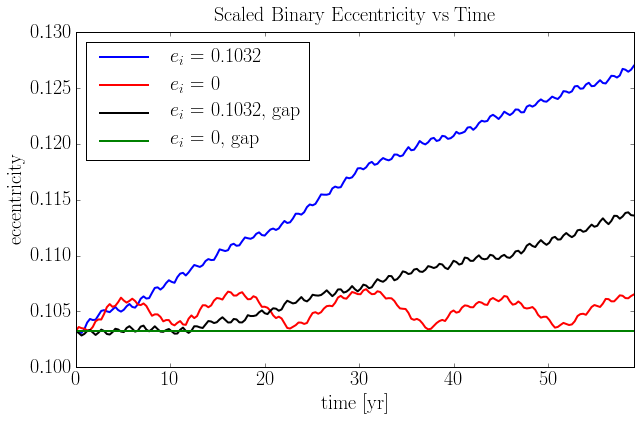

In [35]:
plt.plot(time,e_control,color='blue',linewidth=2,label=r'$e_i$ = 0.1032')
plt.plot(time,e_lowEcc,color='red',linewidth=2,label=r'$e_i$ = 0')
plt.plot(time,e_control_bigGap,color='black',linewidth=2,label=r'$e_i$ = 0.1032, gap')
plt.plot(time,e_lowEcc_bigGap,color='green',linewidth=2,label=r'$e_i$ = 0, gap')

#Format plot
plt.xlim(time[0],time[-1])
plt.xlabel('time [yr]')
plt.ylabel('eccentricity')
plt.title("Scaled Binary Eccentricity vs Time",y=1.02)
plt.legend(loc='upper left')

#plt.savefig("25.09.2015.eVsTimeGap.pdf")

# Plot angular momentum vs time for 60 yr evolution for big gap/normal sims

In [15]:
L_control = [  4.43013504e+52,   4.43009672e+52,   4.43004238e+52,
         4.43000011e+52,   4.42996738e+52,   4.42992089e+52,
         4.42988208e+52,   4.42985619e+52,   4.42983115e+52,
         4.42979917e+52,   4.42976479e+52,   4.42973568e+52,
         4.42970764e+52,   4.42968192e+52,   4.42965004e+52,
         4.42962184e+52,   4.42959519e+52,   4.42957522e+52,
         4.42954452e+52,   4.42951140e+52,   4.42948362e+52,
         4.42945504e+52,   4.42942636e+52,   4.42939415e+52,
         4.42936448e+52,   4.42933531e+52,   4.42930986e+52,
         4.42928331e+52,   4.42926228e+52,   4.42923504e+52,
         4.42921453e+52,   4.42919197e+52,   4.42916749e+52,
         4.42914427e+52,   4.42911778e+52,   4.42909989e+52,
         4.42907184e+52,   4.42904681e+52,   4.42902414e+52,
         4.42900108e+52,   4.42897624e+52,   4.42894756e+52,
         4.42892176e+52,   4.42889196e+52,   4.42886655e+52,
         4.42883862e+52,   4.42880840e+52,   4.42877717e+52,
         4.42875017e+52,   4.42872783e+52,   4.42870553e+52,
         4.42867731e+52,   4.42864855e+52,   4.42862335e+52,
         4.42860090e+52,   4.42857401e+52,   4.42854726e+52,
         4.42851907e+52,   4.42849661e+52,   4.42847152e+52,
         4.42844280e+52,   4.42841699e+52,   4.42839223e+52,
         4.42836634e+52,   4.42833768e+52,   4.42830690e+52,
         4.42828013e+52,   4.42824938e+52,   4.42822571e+52,
         4.42819698e+52,   4.42816720e+52,   4.42813972e+52,
         4.42811939e+52,   4.42809059e+52,   4.42806548e+52,
         4.42803575e+52,   4.42801283e+52,   4.42799137e+52,
         4.42796318e+52,   4.42793369e+52,   4.42791970e+52,
         4.42790378e+52,   4.42788258e+52,   4.42785446e+52,
         4.42783388e+52,   4.42781451e+52,   4.42779661e+52,
         4.42777357e+52,   4.42774891e+52,   4.42772584e+52,
         4.42770185e+52,   4.42767813e+52,   4.42765309e+52,
         4.42762569e+52,   4.42760513e+52,   4.42758061e+52,
         4.42756092e+52,   4.42753273e+52,   4.42751144e+52,
         4.42748663e+52,   4.42746238e+52,   4.42743664e+52,
         4.42741523e+52,   4.42739240e+52,   4.42737019e+52,
         4.42734399e+52,   4.42731416e+52,   4.42729167e+52,
         4.42727213e+52,   4.42724407e+52,   4.42721734e+52,
         4.42718887e+52,   4.42716520e+52,   4.42714026e+52,
         4.42711178e+52,   4.42708937e+52,   4.42706794e+52,
         4.42704574e+52,   4.42701938e+52,   4.42699571e+52,
         4.42697154e+52,   4.42694877e+52,   4.42692420e+52,
         4.42689550e+52,   4.42687266e+52,   4.42684911e+52,
         4.42682120e+52,   4.42679806e+52,   4.42677570e+52,
         4.42675446e+52,   4.42673116e+52,   4.42670347e+52,
         4.42668369e+52,   4.42666042e+52,   4.42664125e+52,
         4.42661315e+52,   4.42658484e+52,   4.42656194e+52,
         4.42653146e+52,   4.42651339e+52,   4.42648772e+52,
         4.42646285e+52,   4.42643823e+52,   4.42641730e+52,
         4.42638809e+52,   4.42636190e+52,   4.42633714e+52,
         4.42631342e+52,   4.42628616e+52,   4.42625937e+52,
         4.42623859e+52,   4.42621385e+52,   4.42618577e+52,
         4.42615754e+52,   4.42613527e+52,   4.42610982e+52,
         4.42608834e+52,   4.42606421e+52,   4.42604292e+52,
         4.42601955e+52,   4.42599719e+52,   4.42596982e+52,
         4.42594580e+52,   4.42592281e+52,   4.42589800e+52,
         4.42587241e+52,   4.42584364e+52,   4.42582569e+52,
         4.42580195e+52,   4.42577744e+52,   4.42575139e+52,
         4.42573159e+52,   4.42570930e+52,   4.42568167e+52,
         4.42565481e+52,   4.42562667e+52,   4.42560326e+52,
         4.42558119e+52,   4.42555323e+52,   4.42553149e+52,
         4.42550878e+52,   4.42548506e+52,   4.42545937e+52,
         4.42543591e+52,   4.42541027e+52,   4.42538758e+52,
         4.42536225e+52,   4.42533737e+52,   4.42531886e+52,
         4.42529648e+52,   4.42527327e+52,   4.42524424e+52,
         4.42522251e+52,   4.42519729e+52,   4.42517232e+52,
         4.42514434e+52,   4.42512175e+52,   4.42509718e+52,
         4.42507436e+52]

L_lowEcc = [  4.45391621e+52,   4.45390678e+52,   4.45388227e+52,
         4.45385157e+52,   4.45382857e+52,   4.45379959e+52,
         4.45375754e+52,   4.45372210e+52,   4.45368960e+52,
         4.45365824e+52,   4.45362509e+52,   4.45359194e+52,
         4.45356391e+52,   4.45354607e+52,   4.45351734e+52,
         4.45349014e+52,   4.45346589e+52,   4.45343969e+52,
         4.45340930e+52,   4.45338228e+52,   4.45335583e+52,
         4.45334107e+52,   4.45332341e+52,   4.45329954e+52,
         4.45327631e+52,   4.45325636e+52,   4.45323124e+52,
         4.45320561e+52,   4.45318466e+52,   4.45315983e+52,
         4.45314369e+52,   4.45312785e+52,   4.45310811e+52,
         4.45309286e+52,   4.45307465e+52,   4.45305198e+52,
         4.45302596e+52,   4.45301293e+52,   4.45299484e+52,
         4.45297428e+52,   4.45295618e+52,   4.45293659e+52,
         4.45292139e+52,   4.45291319e+52,   4.45289278e+52,
         4.45287181e+52,   4.45285093e+52,   4.45283286e+52,
         4.45281370e+52,   4.45280014e+52,   4.45278206e+52,
         4.45277219e+52,   4.45275128e+52,   4.45273683e+52,
         4.45271791e+52,   4.45270449e+52,   4.45268949e+52,
         4.45266895e+52,   4.45265403e+52,   4.45263788e+52,
         4.45261735e+52,   4.45259968e+52,   4.45257838e+52,
         4.45256092e+52,   4.45254565e+52,   4.45253014e+52,
         4.45251431e+52,   4.45250172e+52,   4.45247904e+52,
         4.45246294e+52,   4.45244665e+52,   4.45242651e+52,
         4.45241308e+52,   4.45239321e+52,   4.45237118e+52,
         4.45235268e+52,   4.45233028e+52,   4.45231181e+52,
         4.45229343e+52,   4.45227640e+52,   4.45225773e+52,
         4.45224338e+52,   4.45222606e+52,   4.45220844e+52,
         4.45218805e+52,   4.45217088e+52,   4.45215939e+52,
         4.45214116e+52,   4.45211874e+52,   4.45210022e+52,
         4.45208307e+52,   4.45206658e+52,   4.45204903e+52,
         4.45203285e+52,   4.45201595e+52,   4.45199970e+52,
         4.45198345e+52,   4.45196766e+52,   4.45195400e+52,
         4.45194187e+52,   4.45193281e+52,   4.45191567e+52,
         4.45189946e+52,   4.45188498e+52,   4.45186952e+52,
         4.45185307e+52,   4.45183519e+52,   4.45182217e+52,
         4.45180430e+52,   4.45178922e+52,   4.45177124e+52,
         4.45175161e+52,   4.45173483e+52,   4.45172176e+52,
         4.45170264e+52,   4.45168232e+52,   4.45166359e+52,
         4.45165109e+52,   4.45163125e+52,   4.45161681e+52,
         4.45159665e+52,   4.45158327e+52,   4.45156977e+52,
         4.45154928e+52,   4.45153196e+52,   4.45151538e+52,
         4.45150025e+52,   4.45148727e+52,   4.45146856e+52,
         4.45145090e+52,   4.45143736e+52,   4.45142096e+52,
         4.45140646e+52,   4.45139348e+52,   4.45138206e+52,
         4.45136976e+52,   4.45135477e+52,   4.45133789e+52,
         4.45132147e+52,   4.45130798e+52,   4.45129940e+52,
         4.45128089e+52,   4.45126392e+52,   4.45124988e+52,
         4.45123810e+52,   4.45122402e+52,   4.45120784e+52,
         4.45119439e+52,   4.45118060e+52,   4.45116631e+52,
         4.45115355e+52,   4.45113487e+52,   4.45111678e+52,
         4.45109955e+52,   4.45108390e+52,   4.45106569e+52,
         4.45105002e+52,   4.45103450e+52,   4.45101823e+52,
         4.45099926e+52,   4.45098251e+52,   4.45096705e+52,
         4.45095857e+52,   4.45094446e+52,   4.45092389e+52,
         4.45090238e+52,   4.45088539e+52,   4.45087119e+52,
         4.45085423e+52,   4.45084005e+52,   4.45082290e+52,
         4.45081078e+52,   4.45078970e+52,   4.45077398e+52,
         4.45075752e+52,   4.45073993e+52,   4.45072368e+52,
         4.45070603e+52,   4.45068709e+52,   4.45066813e+52,
         4.45065048e+52,   4.45063713e+52,   4.45062045e+52,
         4.45060353e+52,   4.45058893e+52,   4.45057965e+52,
         4.45056222e+52,   4.45054068e+52,   4.45052689e+52,
         4.45051311e+52,   4.45049626e+52,   4.45047856e+52,
         4.45046130e+52,   4.45044548e+52,   4.45043216e+52,
         4.45042060e+52,   4.45040364e+52,   4.45038514e+52,
         4.45036968e+52]

L_control_bigGap = [  4.43013504e+52,   4.43013495e+52,   4.43013451e+52,
         4.43013466e+52,   4.43013434e+52,   4.43013467e+52,
         4.43013504e+52,   4.43013584e+52,   4.43013676e+52,
         4.43013828e+52,   4.43013860e+52,   4.43013710e+52,
         4.43013657e+52,   4.43013759e+52,   4.43013926e+52,
         4.43013818e+52,   4.43013916e+52,   4.43014008e+52,
         4.43013941e+52,   4.43014048e+52,   4.43014240e+52,
         4.43014186e+52,   4.43014401e+52,   4.43014521e+52,
         4.43014536e+52,   4.43014620e+52,   4.43014665e+52,
         4.43014690e+52,   4.43014818e+52,   4.43015149e+52,
         4.43015354e+52,   4.43015383e+52,   4.43015427e+52,
         4.43015659e+52,   4.43015691e+52,   4.43015757e+52,
         4.43015917e+52,   4.43015833e+52,   4.43015847e+52,
         4.43015765e+52,   4.43016055e+52,   4.43016061e+52,
         4.43016299e+52,   4.43016470e+52,   4.43016595e+52,
         4.43016687e+52,   4.43016883e+52,   4.43016872e+52,
         4.43017010e+52,   4.43017096e+52,   4.43017004e+52,
         4.43017028e+52,   4.43017242e+52,   4.43017266e+52,
         4.43017529e+52,   4.43017595e+52,   4.43017774e+52,
         4.43018140e+52,   4.43017874e+52,   4.43018042e+52,
         4.43018106e+52,   4.43018266e+52,   4.43018515e+52,
         4.43018512e+52,   4.43018604e+52,   4.43018680e+52,
         4.43018814e+52,   4.43018789e+52,   4.43018726e+52,
         4.43018747e+52,   4.43018730e+52,   4.43018792e+52,
         4.43019138e+52,   4.43019058e+52,   4.43019202e+52,
         4.43019090e+52,   4.43018988e+52,   4.43018852e+52,
         4.43019108e+52,   4.43018903e+52,   4.43019044e+52,
         4.43019163e+52,   4.43018943e+52,   4.43018947e+52,
         4.43019023e+52,   4.43019083e+52,   4.43019264e+52,
         4.43019391e+52,   4.43019345e+52,   4.43019457e+52,
         4.43019381e+52,   4.43019324e+52,   4.43019341e+52,
         4.43019426e+52,   4.43019433e+52,   4.43019465e+52,
         4.43019361e+52,   4.43019525e+52,   4.43019500e+52,
         4.43019434e+52,   4.43019309e+52,   4.43019214e+52,
         4.43019338e+52,   4.43019322e+52,   4.43019331e+52,
         4.43019257e+52,   4.43019231e+52,   4.43019191e+52,
         4.43019289e+52,   4.43018958e+52,   4.43018969e+52,
         4.43019068e+52,   4.43019199e+52,   4.43019299e+52,
         4.43019415e+52,   4.43019302e+52,   4.43019331e+52,
         4.43019366e+52,   4.43019236e+52,   4.43019506e+52,
         4.43019203e+52,   4.43019315e+52,   4.43019333e+52,
         4.43019194e+52,   4.43018939e+52,   4.43018748e+52,
         4.43018578e+52,   4.43018463e+52,   4.43018129e+52,
         4.43018108e+52,   4.43017959e+52,   4.43018012e+52,
         4.43018169e+52,   4.43018058e+52,   4.43018208e+52,
         4.43017852e+52,   4.43017966e+52,   4.43017783e+52,
         4.43018008e+52,   4.43018029e+52,   4.43017916e+52,
         4.43017852e+52,   4.43017775e+52,   4.43017731e+52,
         4.43017574e+52,   4.43017401e+52,   4.43017173e+52,
         4.43016924e+52,   4.43016714e+52,   4.43016401e+52,
         4.43016319e+52,   4.43016198e+52,   4.43016060e+52,
         4.43015833e+52,   4.43015706e+52,   4.43015647e+52,
         4.43015460e+52,   4.43015266e+52,   4.43015042e+52,
         4.43015208e+52,   4.43015008e+52,   4.43014842e+52,
         4.43014785e+52,   4.43014591e+52,   4.43014649e+52,
         4.43014477e+52,   4.43014294e+52,   4.43013960e+52,
         4.43013791e+52,   4.43013672e+52,   4.43013491e+52,
         4.43013287e+52,   4.43013092e+52,   4.43012944e+52,
         4.43012852e+52,   4.43012903e+52,   4.43012692e+52,
         4.43012673e+52,   4.43012692e+52,   4.43012314e+52,
         4.43012119e+52,   4.43011979e+52,   4.43011830e+52,
         4.43011482e+52,   4.43011276e+52,   4.43011165e+52,
         4.43011126e+52,   4.43010773e+52,   4.43010517e+52,
         4.43010518e+52,   4.43010323e+52,   4.43010370e+52,
         4.43010399e+52,   4.43010257e+52,   4.43009836e+52,
         4.43009516e+52,   4.43009274e+52,   4.43009137e+52,
         4.43008869e+52]

L_lowEcc_bigGap = [  4.45391621e+52,   4.45391611e+52,   4.45391689e+52,
         4.45391699e+52,   4.45391769e+52,   4.45391731e+52,
         4.45391705e+52,   4.45391786e+52,   4.45391800e+52,
         4.45391648e+52,   4.45391697e+52,   4.45391667e+52,
         4.45391842e+52,   4.45391873e+52,   4.45391952e+52,
         4.45391968e+52,   4.45391998e+52,   4.45391937e+52,
         4.45392125e+52,   4.45392117e+52,   4.45392271e+52,
         4.45392280e+52,   4.45392468e+52,   4.45392539e+52,
         4.45392568e+52,   4.45392535e+52,   4.45392558e+52,
         4.45392633e+52,   4.45392753e+52,   4.45392666e+52,
         4.45392445e+52,   4.45392569e+52,   4.45392721e+52,
         4.45392828e+52,   4.45392834e+52,   4.45392892e+52,
         4.45393198e+52,   4.45393163e+52,   4.45393190e+52,
         4.45393157e+52,   4.45393117e+52,   4.45393260e+52,
         4.45393188e+52,   4.45393137e+52,   4.45393247e+52,
         4.45393431e+52,   4.45393502e+52,   4.45393584e+52,
         4.45393798e+52,   4.45393732e+52,   4.45393732e+52,
         4.45393683e+52,   4.45393618e+52,   4.45393439e+52,
         4.45393572e+52,   4.45393586e+52,   4.45393593e+52,
         4.45393547e+52,   4.45393599e+52,   4.45393511e+52,
         4.45393353e+52,   4.45393370e+52,   4.45393527e+52,
         4.45393659e+52,   4.45393459e+52,   4.45393600e+52,
         4.45393746e+52,   4.45393678e+52,   4.45393621e+52,
         4.45393780e+52,   4.45393793e+52,   4.45393914e+52,
         4.45394048e+52,   4.45394090e+52,   4.45394231e+52,
         4.45394216e+52,   4.45394025e+52,   4.45394197e+52,
         4.45394344e+52,   4.45394315e+52,   4.45394216e+52,
         4.45394239e+52,   4.45394014e+52,   4.45394077e+52,
         4.45394231e+52,   4.45394085e+52,   4.45393937e+52,
         4.45393819e+52,   4.45393746e+52,   4.45393826e+52,
         4.45393770e+52,   4.45393731e+52,   4.45393833e+52,
         4.45393840e+52,   4.45393644e+52,   4.45393516e+52,
         4.45393685e+52,   4.45393814e+52,   4.45393682e+52,
         4.45393726e+52,   4.45393595e+52,   4.45393434e+52,
         4.45393492e+52,   4.45393554e+52,   4.45393493e+52,
         4.45393421e+52,   4.45393386e+52,   4.45393332e+52,
         4.45393190e+52,   4.45393012e+52,   4.45393003e+52,
         4.45392774e+52,   4.45392707e+52,   4.45392722e+52,
         4.45392760e+52,   4.45392710e+52,   4.45392646e+52,
         4.45392527e+52,   4.45392386e+52,   4.45392334e+52,
         4.45392150e+52,   4.45392066e+52,   4.45392215e+52,
         4.45392196e+52,   4.45391992e+52,   4.45391952e+52,
         4.45391935e+52,   4.45391776e+52,   4.45391821e+52,
         4.45391849e+52,   4.45391620e+52,   4.45391372e+52,
         4.45391568e+52,   4.45391512e+52,   4.45391246e+52,
         4.45390905e+52,   4.45391145e+52,   4.45391394e+52,
         4.45391238e+52,   4.45391215e+52,   4.45391248e+52,
         4.45391360e+52,   4.45391326e+52,   4.45391169e+52,
         4.45390901e+52,   4.45390582e+52,   4.45390344e+52,
         4.45390359e+52,   4.45390278e+52,   4.45390269e+52,
         4.45390178e+52,   4.45390168e+52,   4.45389768e+52,
         4.45389763e+52,   4.45389618e+52,   4.45389483e+52,
         4.45389243e+52,   4.45389211e+52,   4.45389096e+52,
         4.45388813e+52,   4.45388736e+52,   4.45388491e+52,
         4.45388335e+52,   4.45388107e+52,   4.45388178e+52,
         4.45388058e+52,   4.45388113e+52,   4.45388008e+52,
         4.45388109e+52,   4.45387935e+52,   4.45387765e+52,
         4.45387457e+52,   4.45386984e+52,   4.45386630e+52,
         4.45386476e+52,   4.45386404e+52,   4.45386120e+52,
         4.45385882e+52,   4.45385752e+52,   4.45385640e+52,
         4.45385555e+52,   4.45385480e+52,   4.45385404e+52,
         4.45385324e+52,   4.45384895e+52,   4.45384549e+52,
         4.45384418e+52,   4.45384187e+52,   4.45383970e+52,
         4.45383807e+52,   4.45383849e+52,   4.45383671e+52,
         4.45383360e+52,   4.45383180e+52,   4.45382975e+52,
         4.45382702e+52,   4.45382528e+52,   4.45382357e+52,
         4.45382507e+52]

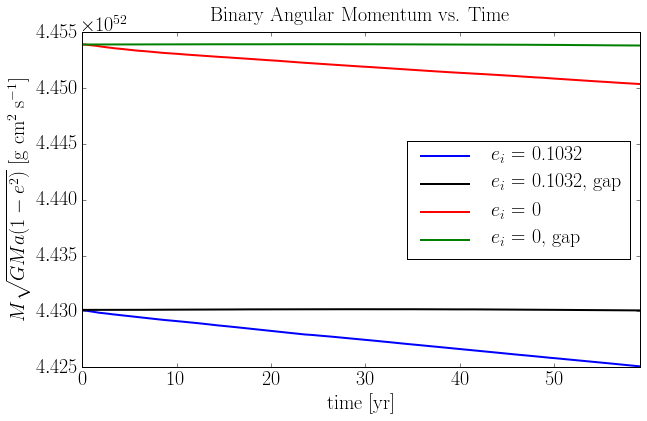

In [28]:
plt.plot(time,L_control,color='blue',linewidth=2,label=r'$e_i$ = 0.1032')
plt.plot(time,L_control_bigGap,color='black',linewidth=2,label=r'$e_i$ = 0.1032, gap')
plt.plot(time,L_lowEcc,color='red',linewidth=2,label=r'$e_i$ = 0')
plt.plot(time,L_lowEcc_bigGap,color='green',linewidth=2,label=r'$e_i$ = 0, gap')

#Format plot
plt.xlim(time[0],time[-1])
plt.xlabel('time [yr]')
plt.ylabel('$M\sqrt{GMa(1-e^2)}$ [g cm$^2$ s$^{-1}$]')
plt.title("Binary Angular Momentum vs. Time",y=1.02)
plt.legend(loc='center right')

#plt.savefig("25.09.2015.LVsTimeGap.pdf")

# Plot a, e, L for the 520 yr sims

# Kepler 38 Long (e_i = 0.1032)

In [36]:
time_long = [   0.        ,    2.18838047,    4.37676094,    6.5651414 ,
          8.75352187,   10.94190234,   13.13028281,   15.31866327,
         17.50704374,   19.69542421,   21.88380468,   24.07218514,
         26.26056561,   28.44894608,   30.63732655,   32.82570701,
         35.01408748,   37.20246795,   39.39084842,   41.57922888,
         43.76760935,   45.95598982,   48.14437029,   50.33275075,
         52.52113122,   54.70951169,   56.89789216,   59.08627262,
         61.27465309,   63.46303356,   65.65141403,   67.83979449,
         70.02817496,   72.21655543,   74.4049359 ,   76.59331636,
         78.78169683,   80.9700773 ,   83.15845777,   85.34683823,
         87.5352187 ,   89.72359917,   91.91197964,   94.1003601 ,
         96.28874057,   98.47712104,  100.66550151,  102.85388197,
        105.04226244,  107.23064291,  109.41902338,  111.60740384,
        113.79578431,  115.98416478,  118.17254525,  120.36092571,
        122.54930618,  124.73768665,  126.92606712,  129.11444758,
        131.30282805,  133.49120852,  135.67958899,  137.86796945,
        140.05634992,  142.24473039,  144.43311086,  146.62149132,
        148.80987179,  150.99825226,  153.18663273,  155.37501319,
        157.56339366,  159.75177413,  161.9401546 ,  164.12853506,
        166.31691553,  168.505296  ,  170.69367647,  172.88205693,
        175.0704374 ,  177.25881787,  179.44719834,  181.6355788 ,
        183.82395927,  186.01233974,  188.20072021,  190.38910067,
        192.57748114,  194.76586161,  196.95424208,  199.14262254,
        201.33100301,  203.51938348,  205.70776395,  207.89614441,
        210.08452488,  212.27290535,  214.46128582,  216.64966628,
        218.83804675,  221.02642722,  223.21480769,  225.40318815,
        227.59156862,  229.77994909,  231.96832956,  234.15671002,
        236.34509049,  238.53347096,  240.72185143,  242.91023189,
        245.09861236,  247.28699283,  249.4753733 ,  251.66375376,
        253.85213423,  256.0405147 ,  258.22889517,  260.41727563,
        262.6056561 ,  264.79403657,  266.98241704,  269.1707975 ,
        271.35917797,  273.54755844,  275.73593891,  277.92431937,
        280.11269984,  282.30108031,  284.48946078,  286.67784124,
        288.86622171,  291.05460218,  293.24298265,  295.43136311,
        297.61974358,  299.80812405,  301.99650452,  304.18488498,
        306.37326545,  308.56164592,  310.75002639,  312.93840685,
        315.12678732,  317.31516779,  319.50354826,  321.69192872,
        323.88030919,  326.06868966,  328.25707013,  330.44545059,
        332.63383106,  334.82221153,  337.010592  ,  339.19897246,
        341.38735293,  343.5757334 ,  345.76411387,  347.95249433,
        350.1408748 ,  352.32925527,  354.51763574,  356.7060162 ,
        358.89439667,  361.08277714,  363.27115761,  365.45953807,
        367.64791854,  369.83629901,  372.02467948,  374.21305994,
        376.40144041,  378.58982088,  380.77820135,  382.96658181,
        385.15496228,  387.34334275,  389.53172322,  391.72010368,
        393.90848415,  396.09686462,  398.28524509,  400.47362555,
        402.66200602,  404.85038649,  407.03876696,  409.22714743,
        411.41552789,  413.60390836,  415.79228883,  417.9806693 ,
        420.16904976,  422.35743023,  424.5458107 ,  426.73419117,
        428.92257163,  431.1109521 ,  433.29933257,  435.48771304,
        437.6760935 ,  439.86447397,  442.05285444,  444.24123491,
        446.42961537,  448.61799584,  450.80637631,  452.99475678,
        455.18313724,  457.37151771,  459.55989818,  461.74827865,
        463.93665911,  466.12503958,  468.31342005,  470.50180052,
        472.69018098,  474.87856145,  477.06694192,  479.25532239,
        481.44370285,  483.63208332,  485.82046379,  488.00884426,
        490.19722472,  492.38560519,  494.57398566,  496.76236613,
        498.95074659,  501.13912706,  503.32750753,  505.515888  ,
        507.70426846,  509.89264893,  512.0810294 ,  514.26940987,
        516.45779033,  518.6461708 ,  520.83455127]

L_control_long = [  4.43013504e+52,   4.42984900e+52,   4.42963338e+52,
         4.42940959e+52,   4.42921223e+52,   4.42903216e+52,
         4.42885104e+52,   4.42865226e+52,   4.42848575e+52,
         4.42830452e+52,   4.42811577e+52,   4.42793291e+52,
         4.42775114e+52,   4.42756694e+52,   4.42739660e+52,
         4.42722349e+52,   4.42704289e+52,   4.42687179e+52,
         4.42670233e+52,   4.42653207e+52,   4.42635216e+52,
         4.42617459e+52,   4.42600768e+52,   4.42582661e+52,
         4.42565274e+52,   4.42547809e+52,   4.42529518e+52,
         4.42512527e+52,   4.42495977e+52,   4.42477847e+52,
         4.42461122e+52,   4.42444398e+52,   4.42426784e+52,
         4.42408616e+52,   4.42392211e+52,   4.42375385e+52,
         4.42357067e+52,   4.42338668e+52,   4.42321887e+52,
         4.42305964e+52,   4.42287156e+52,   4.42268700e+52,
         4.42251869e+52,   4.42235203e+52,   4.42218107e+52,
         4.42199042e+52,   4.42180956e+52,   4.42165680e+52,
         4.42149978e+52,   4.42132270e+52,   4.42113105e+52,
         4.42096996e+52,   4.42082018e+52,   4.42063946e+52,
         4.42046089e+52,   4.42028574e+52,   4.42011947e+52,
         4.41996255e+52,   4.41978632e+52,   4.41960019e+52,
         4.41942744e+52,   4.41927163e+52,   4.41910558e+52,
         4.41891782e+52,   4.41872269e+52,   4.41856173e+52,
         4.41840618e+52,   4.41823664e+52,   4.41805154e+52,
         4.41787149e+52,   4.41771070e+52,   4.41754622e+52,
         4.41737479e+52,   4.41718686e+52,   4.41699465e+52,
         4.41682971e+52,   4.41667743e+52,   4.41652190e+52,
         4.41634815e+52,   4.41615271e+52,   4.41597894e+52,
         4.41580950e+52,   4.41565439e+52,   4.41548410e+52,
         4.41530193e+52,   4.41512184e+52,   4.41497015e+52,
         4.41482413e+52,   4.41466593e+52,   4.41447530e+52,
         4.41429258e+52,   4.41412823e+52,   4.41396371e+52,
         4.41380096e+52,   4.41360971e+52,   4.41342634e+52,
         4.41325355e+52,   4.41309207e+52,   4.41294776e+52,
         4.41278301e+52,   4.41258420e+52,   4.41239525e+52,
         4.41222154e+52,   4.41207277e+52,   4.41191384e+52,
         4.41173782e+52,   4.41153688e+52,   4.41134992e+52,
         4.41118670e+52,   4.41104775e+52,   4.41090632e+52,
         4.41073189e+52,   4.41054049e+52,   4.41035240e+52,
         4.41018116e+52,   4.41004260e+52,   4.40989734e+52,
         4.40973398e+52,   4.40953950e+52,   4.40934377e+52,
         4.40917571e+52,   4.40903145e+52,   4.40888715e+52,
         4.40872984e+52,   4.40853807e+52,   4.40833063e+52,
         4.40815920e+52,   4.40800244e+52,   4.40788117e+52,
         4.40775208e+52,   4.40758429e+52,   4.40739197e+52,
         4.40719410e+52,   4.40702169e+52,   4.40687173e+52,
         4.40673929e+52,   4.40659709e+52,   4.40642401e+52,
         4.40623368e+52,   4.40603689e+52,   4.40587813e+52,
         4.40574077e+52,   4.40560528e+52,   4.40546341e+52,
         4.40530151e+52,   4.40509531e+52,   4.40488924e+52,
         4.40471978e+52,   4.40457696e+52,   4.40444654e+52,
         4.40431829e+52,   4.40416535e+52,   4.40397336e+52,
         4.40376363e+52,   4.40358189e+52,   4.40342562e+52,
         4.40329576e+52,   4.40316500e+52,   4.40302532e+52,
         4.40286569e+52,   4.40267100e+52,   4.40247092e+52,
         4.40229426e+52,   4.40215367e+52,   4.40203398e+52,
         4.40190555e+52,   4.40175991e+52,   4.40159611e+52,
         4.40139638e+52,   4.40119222e+52,   4.40102280e+52,
         4.40088093e+52,   4.40075783e+52,   4.40063330e+52,
         4.40049866e+52,   4.40032869e+52,   4.40012831e+52,
         4.39992513e+52,   4.39975359e+52,   4.39962268e+52,
         4.39949987e+52,   4.39938185e+52,   4.39925194e+52,
         4.39908752e+52,   4.39888126e+52,   4.39867486e+52,
         4.39850546e+52,   4.39835548e+52,   4.39823977e+52,
         4.39811606e+52,   4.39798988e+52,   4.39783070e+52,
         4.39763780e+52,   4.39742644e+52,   4.39723641e+52,
         4.39709085e+52,   4.39696534e+52,   4.39684500e+52,
         4.39671984e+52,   4.39658053e+52,   4.39639828e+52,
         4.39619283e+52,   4.39599017e+52,   4.39580908e+52,
         4.39566600e+52,   4.39553975e+52,   4.39541211e+52,
         4.39529949e+52,   4.39516344e+52,   4.39498073e+52,
         4.39477305e+52,   4.39457221e+52,   4.39440853e+52,
         4.39426458e+52,   4.39415774e+52,   4.39403916e+52,
         4.39392489e+52,   4.39378189e+52,   4.39361144e+52,
         4.39341207e+52,   4.39321491e+52,   4.39304920e+52,
         4.39292355e+52,   4.39280635e+52,   4.39269583e+52,
         4.39257156e+52,   4.39242427e+52,   4.39224755e+52,
         4.39204621e+52,   4.39184652e+52,   4.39167450e+52,
         4.39153537e+52,   4.39142104e+52,   4.39132142e+52,
         4.39121465e+52,   4.39107338e+52,   4.39089209e+52,
         4.39069007e+52,   4.39049205e+52]

e_control_long = [ 0.10324994,  0.10456675,  0.10579667,  0.10648618,  0.10800922,
        0.10919078,  0.1102418 ,  0.11111188,  0.11247313,  0.11310767,
        0.11433404,  0.11524089,  0.11618899,  0.11633311,  0.11790925,
        0.11850551,  0.11909518,  0.12028451,  0.12107948,  0.12226715,
        0.12275131,  0.12394249,  0.124927  ,  0.12563821,  0.12636383,
        0.1270207 ,  0.12724311,  0.12846517,  0.12947051,  0.12959996,
        0.13049805,  0.13129992,  0.13148734,  0.13215926,  0.13344962,
        0.13355779,  0.13364433,  0.1346807 ,  0.13550389,  0.13586797,
        0.13634569,  0.13724369,  0.13782881,  0.13813615,  0.13862772,
        0.13935059,  0.14026817,  0.1408715 ,  0.14077815,  0.14130141,
        0.1419903 ,  0.14262468,  0.14309673,  0.1433779 ,  0.1438213 ,
        0.14464802,  0.14535246,  0.14567992,  0.14592056,  0.14630161,
        0.14691913,  0.14761945,  0.14814142,  0.1482838 ,  0.14870591,
        0.14932738,  0.1498018 ,  0.15026869,  0.15121632,  0.15170949,
        0.15207325,  0.15232426,  0.15245887,  0.15267649,  0.1530476 ,
        0.15368499,  0.15424096,  0.15454977,  0.15465725,  0.15470522,
        0.1548833 ,  0.15509449,  0.15552143,  0.15579632,  0.15621024,
        0.15680287,  0.15734822,  0.15766951,  0.15789489,  0.15814572,
        0.15848744,  0.15892857,  0.15913701,  0.15949233,  0.16023261,
        0.16062101,  0.1611254 ,  0.16169696,  0.16271549,  0.16314415,
        0.16358621,  0.16401593,  0.16438842,  0.16465821,  0.16465647,
        0.16493886,  0.16494247,  0.16540827,  0.16586884,  0.16621417,
        0.16650704,  0.16685845,  0.16703603,  0.16728505,  0.16792091,
        0.16824444,  0.16837521,  0.16850447,  0.16871633,  0.16905958,
        0.16938963,  0.16965214,  0.17025508,  0.17016177,  0.17054907,
        0.17097788,  0.17132015,  0.17165498,  0.17181175,  0.17179156,
        0.17220045,  0.17253155,  0.17297092,  0.17341067,  0.1736416 ,
        0.17396586,  0.17423312,  0.17472415,  0.1749793 ,  0.17515816,
        0.17575401,  0.17610685,  0.1761628 ,  0.17625509,  0.17685337,
        0.17698914,  0.17714911,  0.17736213,  0.17748268,  0.17765662,
        0.1778421 ,  0.17777176,  0.17786966,  0.1779086 ,  0.17813898,
        0.17843512,  0.17859504,  0.17878742,  0.17888353,  0.1794021 ,
        0.17955253,  0.17956548,  0.17983878,  0.1803071 ,  0.1806502 ,
        0.18079563,  0.18106805,  0.18121393,  0.18157834,  0.18186048,
        0.18219322,  0.18241578,  0.18251447,  0.18264986,  0.18260701,
        0.18281179,  0.18300242,  0.18311692,  0.18313862,  0.18329542,
        0.18357505,  0.18353721,  0.18369577,  0.18382823,  0.18418147,
        0.1844492 ,  0.18484261,  0.18505108,  0.18538115,  0.18579039,
        0.18612929,  0.18627356,  0.18636986,  0.18668055,  0.18688699,
        0.1870931 ,  0.18734555,  0.18747287,  0.18751527,  0.18755965,
        0.18765097,  0.18775467,  0.1879168 ,  0.18811181,  0.18829362,
        0.18831248,  0.1883408 ,  0.18852185,  0.18895014,  0.18890606,
        0.18895592,  0.18916673,  0.18952682,  0.18969612,  0.1899773 ,
        0.18992512,  0.19016251,  0.19007314,  0.19037088,  0.19057501,
        0.19077158,  0.19092491,  0.19104793,  0.1913277 ,  0.19138196,
        0.19153592,  0.19175734,  0.19221451,  0.19231207,  0.19244801,
        0.19270511,  0.19281666,  0.19289315,  0.19299978,  0.19291112,
        0.19289142,  0.19293268,  0.19310667,  0.19324705]

a_control_long = [ 0.14690818,  0.14692614,  0.14694948,  0.14695592,  0.1469907 ,
        0.14701612,  0.14703785,  0.14705277,  0.14708624,  0.14709502,
        0.14712365,  0.14714203,  0.14716232,  0.14715463,  0.14719777,
        0.14720686,  0.14721535,  0.14724595,  0.14726279,  0.14729428,
        0.14729962,  0.14733136,  0.14735646,  0.14737073,  0.14738606,
        0.14739909,  0.14739506,  0.14743011,  0.14745749,  0.14745006,
        0.14747345,  0.14749341,  0.14748881,  0.14750293,  0.14754293,
        0.14753573,  0.14752675,  0.1475558 ,  0.14757761,  0.14758147,
        0.14758824,  0.14761253,  0.14762507,  0.14762641,  0.14763511,
        0.14765232,  0.14767853,  0.14769333,  0.14767852,  0.14768864,
        0.14770496,  0.14772094,  0.14773085,  0.14773077,  0.14773768,
        0.14776157,  0.14778099,  0.14778459,  0.14778306,  0.14778714,
        0.14780253,  0.14782301,  0.14783503,  0.14782861,  0.14783428,
        0.14785109,  0.14786189,  0.14787155,  0.14790209,  0.14791228,
        0.14791787,  0.14791818,  0.14791272,  0.1479099 ,  0.14791397,
        0.14793215,  0.14794757,  0.14795132,  0.14794447,  0.14793338,
        0.14792988,  0.14792829,  0.14793775,  0.14793914,  0.14794617,
        0.14796196,  0.14797733,  0.14798257,  0.14798251,  0.1479816 ,
        0.14798544,  0.14799548,  0.14799434,  0.14800043,  0.14802339,
        0.14802971,  0.14804245,  0.1480594 ,  0.14809952,  0.14810945,
        0.14811792,  0.14812641,  0.14813317,  0.1481363 ,  0.14812542,
        0.14812752,  0.1481141 ,  0.14812476,  0.14813665,  0.14814442,
        0.14814946,  0.14815545,  0.14815148,  0.14815135,  0.14817209,
        0.14817899,  0.14817566,  0.14817109,  0.14816875,  0.14817301,
        0.1481784 ,  0.14818192,  0.14820323,  0.14818761,  0.14819465,
        0.14820282,  0.1482088 ,  0.1482156 ,  0.14821525,  0.14820516,
        0.14821524,  0.14821961,  0.14822934,  0.14824071,  0.14824265,
        0.14825067,  0.14825518,  0.14826951,  0.14827014,  0.14826625,
        0.14828716,  0.1482965 ,  0.1482902 ,  0.14828538,  0.1483065 ,
        0.14829983,  0.14829445,  0.14829426,  0.1482909 ,  0.14829137,
        0.14829259,  0.14827826,  0.14827055,  0.1482584 ,  0.14825851,
        0.14826385,  0.14826356,  0.14826515,  0.1482608 ,  0.14827823,
        0.14827324,  0.14826024,  0.14826306,  0.14827909,  0.14828976,
        0.14828904,  0.14829411,  0.14829091,  0.14829757,  0.1482993 ,
        0.14830617,  0.14830888,  0.14830587,  0.14830486,  0.14829316,
        0.14829297,  0.14829001,  0.14828258,  0.14827204,  0.1482717 ,
        0.14827894,  0.1482687 ,  0.14826857,  0.14826471,  0.14827063,
        0.14827165,  0.14828217,  0.1482837 ,  0.14829434,  0.1483092 ,
        0.14831985,  0.14831724,  0.14830961,  0.14831311,  0.14831193,
        0.14831369,  0.14831956,  0.14831861,  0.14831244,  0.1483054 ,
        0.14829821,  0.14829027,  0.14828582,  0.14828478,  0.14828531,
        0.14827779,  0.14827072,  0.14827334,  0.14828868,  0.14827364,
        0.14826241,  0.14826094,  0.14827071,  0.14827064,  0.14827952,
        0.14826831,  0.14827426,  0.14825921,  0.14826499,  0.14826342,
        0.14826149,  0.1482591 ,  0.14825764,  0.14826594,  0.14826153,
        0.14826206,  0.14826509,  0.14827999,  0.14827207,  0.14826656,
        0.14826997,  0.148267  ,  0.14826364,  0.14826296,  0.14825024,
        0.14823928,  0.1482294 ,  0.148226  ,  0.14822083]

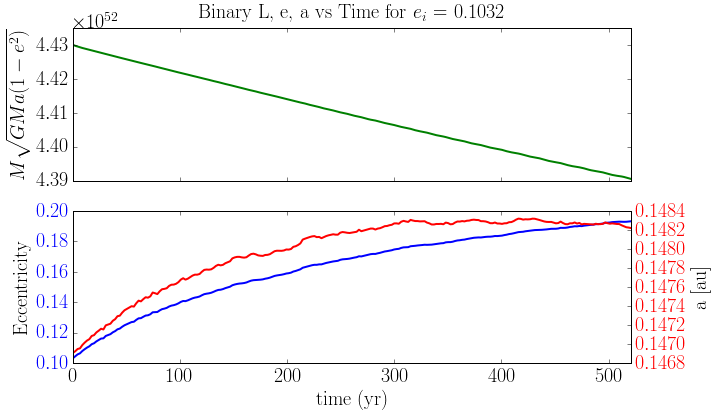

In [56]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)

#Top axis
axarr[0].plot(time_long, L_control_long,color='green',linewidth=2)
axarr[0].set_title('Binary L, e, a vs Time for $e_i$ = 0.1032',y=1.02)
axarr[0].set_ylabel('$M\sqrt{GMa(1-e^2)}$')
axarr[0].set_xlim(time_long[0],time_long[-1])

#Bottom axis, left scale
axarr[1].plot(time_long, e_control_long,color='blue',linewidth=2)
for tl in axarr[1].get_yticklabels():
    tl.set_color('blue')
axarr[1].set_xlabel('time (yr)')
axarr[1].set_ylabel('Eccentricity', color='black')
axarr[1].set_xlim(time_long[0],time_long[-1])


#Bottom axis, right scale
ax2 = axarr[1].twinx()
ax2.plot(time_long,a_control_long, 'r',linewidth=2)
ax2.set_ylabel('a [au]', color='black')
for tl in ax2.get_yticklabels():
    tl.set_color('red')
ax2.set_xlim(time_long[0],time_long[-1])

#plt.savefig("25.09.2015.binALEKepler38Long.pdf",bbox_inches='tight')

# Same thing as above, but for $e_i$ = 0

In [57]:
L_lowEcc_long = [  4.45391621e+52,   4.45372433e+52,   4.45350018e+52,
         4.45331834e+52,   4.45315756e+52,   4.45301594e+52,
         4.45286772e+52,   4.45273160e+52,   4.45260468e+52,
         4.45247472e+52,   4.45234436e+52,   4.45222440e+52,
         4.45209807e+52,   4.45197506e+52,   4.45185562e+52,
         4.45173360e+52,   4.45161081e+52,   4.45148744e+52,
         4.45136975e+52,   4.45123495e+52,   4.45110431e+52,
         4.45097634e+52,   4.45086635e+52,   4.45073424e+52,
         4.45062640e+52,   4.45049721e+52,   4.45037322e+52,
         4.45025614e+52,   4.45013269e+52,   4.45001161e+52,
         4.44988073e+52,   4.44974386e+52,   4.44961114e+52,
         4.44947990e+52,   4.44934832e+52,   4.44922664e+52,
         4.44911989e+52,   4.44900563e+52,   4.44887712e+52,
         4.44874172e+52,   4.44861704e+52,   4.44848774e+52,
         4.44836301e+52,   4.44824349e+52,   4.44811864e+52,
         4.44799716e+52,   4.44787405e+52,   4.44775817e+52,
         4.44763295e+52,   4.44751185e+52,   4.44738783e+52,
         4.44726979e+52,   4.44713985e+52,   4.44702284e+52,
         4.44689502e+52,   4.44677308e+52,   4.44665501e+52,
         4.44653559e+52,   4.44640868e+52,   4.44628758e+52,
         4.44616815e+52,   4.44604710e+52,   4.44592731e+52,
         4.44580049e+52,   4.44567726e+52,   4.44556005e+52,
         4.44543825e+52,   4.44532348e+52,   4.44520891e+52,
         4.44507481e+52,   4.44493978e+52,   4.44481527e+52,
         4.44469158e+52,   4.44456856e+52,   4.44445003e+52,
         4.44431571e+52,   4.44419941e+52,   4.44407388e+52,
         4.44396577e+52,   4.44384679e+52,   4.44371995e+52,
         4.44361043e+52,   4.44348779e+52,   4.44336373e+52,
         4.44323615e+52,   4.44311467e+52,   4.44298353e+52,
         4.44286354e+52,   4.44273543e+52,   4.44261064e+52,
         4.44248554e+52,   4.44235624e+52,   4.44223231e+52,
         4.44210311e+52,   4.44198413e+52,   4.44186643e+52,
         4.44174311e+52,   4.44162614e+52,   4.44150454e+52,
         4.44138639e+52,   4.44126768e+52,   4.44114935e+52,
         4.44102103e+52,   4.44090188e+52,   4.44077790e+52,
         4.44064875e+52,   4.44053052e+52,   4.44040970e+52,
         4.44028884e+52,   4.44017103e+52,   4.44003713e+52,
         4.43990846e+52,   4.43977489e+52,   4.43964524e+52,
         4.43952696e+52,   4.43941034e+52,   4.43929080e+52,
         4.43916356e+52,   4.43904122e+52,   4.43890868e+52,
         4.43878615e+52,   4.43866126e+52,   4.43852838e+52,
         4.43841259e+52,   4.43829606e+52,   4.43817326e+52,
         4.43805381e+52,   4.43793248e+52,   4.43780406e+52,
         4.43768580e+52,   4.43756552e+52,   4.43745818e+52,
         4.43734548e+52,   4.43722890e+52,   4.43710582e+52,
         4.43698535e+52,   4.43686006e+52,   4.43673155e+52,
         4.43660710e+52,   4.43648198e+52,   4.43635955e+52,
         4.43623318e+52,   4.43611768e+52,   4.43599251e+52,
         4.43587028e+52,   4.43574434e+52,   4.43562036e+52,
         4.43550510e+52,   4.43538142e+52,   4.43526188e+52,
         4.43515610e+52,   4.43504012e+52,   4.43492231e+52,
         4.43480771e+52,   4.43469027e+52,   4.43455920e+52,
         4.43444420e+52,   4.43432572e+52,   4.43421127e+52,
         4.43409430e+52,   4.43397320e+52,   4.43385100e+52,
         4.43373521e+52,   4.43361235e+52,   4.43349134e+52,
         4.43337887e+52,   4.43326061e+52,   4.43314553e+52,
         4.43302742e+52,   4.43292256e+52,   4.43280891e+52,
         4.43269255e+52,   4.43257457e+52,   4.43244983e+52,
         4.43232919e+52,   4.43220645e+52,   4.43209483e+52,
         4.43198012e+52,   4.43186844e+52,   4.43175112e+52,
         4.43163769e+52,   4.43152526e+52,   4.43140367e+52,
         4.43129158e+52,   4.43117817e+52,   4.43106248e+52,
         4.43094248e+52,   4.43082638e+52,   4.43071395e+52,
         4.43060141e+52,   4.43049193e+52,   4.43037871e+52,
         4.43026111e+52,   4.43014507e+52,   4.43002872e+52,
         4.42991940e+52,   4.42981084e+52,   4.42969931e+52,
         4.42958182e+52,   4.42947182e+52,   4.42936257e+52,
         4.42924336e+52,   4.42913309e+52,   4.42901539e+52,
         4.42889760e+52,   4.42878780e+52,   4.42868145e+52,
         4.42856743e+52,   4.42845645e+52,   4.42834384e+52,
         4.42822716e+52,   4.42810365e+52,   4.42798526e+52,
         4.42787014e+52,   4.42775466e+52,   4.42764270e+52,
         4.42753068e+52,   4.42743029e+52,   4.42731537e+52,
         4.42720901e+52,   4.42710028e+52,   4.42698158e+52,
         4.42686537e+52,   4.42674690e+52,   4.42663866e+52,
         4.42652776e+52,   4.42641121e+52,   4.42630934e+52,
         4.42620005e+52,   4.42608582e+52,   4.42598036e+52,
         4.42586751e+52,   4.42574405e+52,   4.42563320e+52,
         4.42551320e+52,   4.42539556e+52,   4.42528214e+52,
         4.42517045e+52,   4.42505704e+52]

a_lowEcc_long = [ 0.14690665,  0.14689188,  0.14687613,  0.14686301,  0.14685039,
        0.14683979,  0.14682955,  0.1468199 ,  0.14681133,  0.14680118,
        0.14679108,  0.14678169,  0.14677258,  0.14676448,  0.14675618,
        0.14674737,  0.14673802,  0.14672848,  0.14671974,  0.14671075,
        0.14670191,  0.14669331,  0.14668499,  0.14667511,  0.14666672,
        0.14665777,  0.14664934,  0.14664175,  0.14663306,  0.14662407,
        0.14661447,  0.1466045 ,  0.14659568,  0.14658706,  0.14657889,
        0.14657   ,  0.14656182,  0.14655306,  0.1465432 ,  0.14653402,
        0.14652577,  0.1465175 ,  0.14650908,  0.1465003 ,  0.14649123,
        0.14648204,  0.14647316,  0.14646527,  0.14645764,  0.14645005,
        0.14644094,  0.1464316 ,  0.14642216,  0.14641367,  0.146405  ,
        0.14639715,  0.14638944,  0.14638177,  0.14637236,  0.14636282,
        0.14635378,  0.14634527,  0.14633757,  0.1463297 ,  0.14632144,
        0.14631271,  0.14630368,  0.14629504,  0.1462866 ,  0.14627749,
        0.14626884,  0.14626074,  0.14625244,  0.14624405,  0.14623544,
        0.1462255 ,  0.14621698,  0.14620836,  0.14620102,  0.14619343,
        0.1461851 ,  0.14617745,  0.1461686 ,  0.14615925,  0.14615009,
        0.14614158,  0.14613323,  0.14612562,  0.14611734,  0.14610882,
        0.14609983,  0.14609037,  0.1460815 ,  0.1460725 ,  0.14606465,
        0.14605733,  0.14604907,  0.14604093,  0.14603212,  0.14602336,
        0.14601455,  0.1460062 ,  0.14599763,  0.14598989,  0.14598191,
        0.1459734 ,  0.14596496,  0.14595647,  0.14594768,  0.14593917,
        0.14593018,  0.1459218 ,  0.14591336,  0.14590485,  0.14589682,
        0.14588864,  0.14587985,  0.14587038,  0.14586174,  0.14585281,
        0.14584471,  0.14583648,  0.14582765,  0.14581969,  0.14581145,
        0.14580281,  0.14579435,  0.14578583,  0.14577714,  0.14576923,
        0.14576135,  0.14575411,  0.14574639,  0.14573811,  0.14572949,
        0.14572098,  0.14571247,  0.14570405,  0.14569596,  0.14568771,
        0.14567965,  0.1456709 ,  0.14566254,  0.14565358,  0.145645  ,
        0.14563638,  0.14562814,  0.14562066,  0.14561247,  0.14560446,
        0.14559695,  0.14558843,  0.14558012,  0.14557206,  0.14556403,
        0.14555525,  0.14554764,  0.14553996,  0.14553242,  0.14552447,
        0.14551601,  0.14550728,  0.14549898,  0.14549066,  0.14548273,
        0.14547533,  0.14546771,  0.14546013,  0.14545214,  0.14544486,
        0.14543663,  0.14542819,  0.14541981,  0.14541146,  0.14540353,
        0.1453955 ,  0.145388  ,  0.14538038,  0.14537286,  0.14536471,
        0.14535665,  0.14534863,  0.14534031,  0.14533266,  0.14532491,
        0.14531722,  0.14530948,  0.14530189,  0.14529413,  0.14528617,
        0.14527854,  0.14527069,  0.14526247,  0.14525473,  0.14524701,
        0.14523954,  0.14523223,  0.14522487,  0.14521688,  0.14520901,
        0.14520147,  0.14519343,  0.14518582,  0.145178  ,  0.14517027,
        0.14516288,  0.14515588,  0.1451483 ,  0.14514056,  0.1451328 ,
        0.1451249 ,  0.14511626,  0.14510836,  0.14510083,  0.14509327,
        0.14508622,  0.14507864,  0.14507167,  0.14506404,  0.14505628,
        0.14504856,  0.14504058,  0.14503251,  0.14502501,  0.14501787,
        0.14501063,  0.14500308,  0.14499572,  0.14498839,  0.14498043,
        0.14497297,  0.14496526,  0.14495694,  0.1449498 ,  0.14494186,
        0.14493433,  0.14492672,  0.1449191 ,  0.14491156]

e_lowEcc_long = [  4.52803861e-05,   1.06330718e-03,   2.04580103e-03,
         2.26516751e-03,   9.21525879e-04,   7.06613930e-04,
         2.15712379e-03,   2.72395388e-03,   3.59539701e-03,
         2.83795535e-03,   1.91157199e-03,   3.95529916e-04,
         9.44332703e-04,   2.59650268e-03,   3.10606857e-03,
         3.11950579e-03,   2.44191424e-03,   1.08394839e-03,
         5.03876006e-04,   1.89067157e-03,   2.52411518e-03,
         3.03605727e-03,   2.75325908e-03,   1.84152603e-03,
         8.39190326e-04,   1.47600153e-03,   2.03371674e-03,
         3.11386699e-03,   3.21113108e-03,   2.66017246e-03,
         1.95919290e-03,   1.07447373e-03,   1.99891690e-03,
         2.74143128e-03,   3.88352959e-03,   3.51502441e-03,
         3.18050242e-03,   2.49562276e-03,   1.07304712e-03,
         1.57232095e-03,   2.42276533e-03,   3.34638161e-03,
         3.61100610e-03,   3.30128294e-03,   2.90958941e-03,
         1.92308803e-03,   1.62234441e-03,   2.22675531e-03,
         3.55172418e-03,   4.34306773e-03,   3.91614957e-03,
         2.90897506e-03,   2.30339349e-03,   1.98903227e-03,
         2.36243515e-03,   3.16021857e-03,   3.79480394e-03,
         4.36774807e-03,   3.84064527e-03,   2.71935942e-03,
         1.64136393e-03,   1.42840301e-03,   2.67920309e-03,
         3.63518294e-03,   3.90701086e-03,   3.44576751e-03,
         2.84889766e-03,   2.09598311e-03,   1.33041486e-03,
         1.61846603e-03,   2.48235883e-03,   2.98335872e-03,
         3.31864355e-03,   3.39797656e-03,   3.00034914e-03,
         1.97248814e-03,   1.23267386e-03,   1.34257678e-03,
         2.15015912e-03,   3.12705112e-03,   3.53535879e-03,
         3.63530255e-03,   3.19410715e-03,   2.18061314e-03,
         1.47784280e-03,   1.49959965e-03,   2.50012149e-03,
         3.29048222e-03,   3.82014104e-03,   3.82796702e-03,
         3.41530003e-03,   2.67030974e-03,   2.06358386e-03,
         1.91491449e-03,   2.56300176e-03,   3.49405566e-03,
         3.66038226e-03,   3.65628969e-03,   3.19662542e-03,
         2.48892780e-03,   1.42127244e-03,   1.21852677e-03,
         1.61009232e-03,   2.46613393e-03,   3.10588557e-03,
         3.40150013e-03,   3.01972468e-03,   2.80540010e-03,
         1.97431790e-03,   1.37725941e-03,   1.59229565e-03,
         2.29294173e-03,   3.00742303e-03,   3.29213016e-03,
         3.56982458e-03,   3.45835492e-03,   2.85602892e-03,
         1.64229279e-03,   9.51512595e-04,   1.25536084e-03,
         1.70798532e-03,   2.14855639e-03,   2.38825334e-03,
         2.45014564e-03,   2.24852467e-03,   1.84168170e-03,
         1.05065315e-03,   1.75068141e-04,   7.20802091e-04,
         1.38402067e-03,   2.15257928e-03,   2.57584158e-03,
         2.69195563e-03,   2.30050265e-03,   1.94149824e-03,
         1.39563875e-03,   1.39303007e-03,   2.06469147e-03,
         2.62007600e-03,   2.99773949e-03,   3.22385682e-03,
         2.93231257e-03,   2.38049709e-03,   1.62920632e-03,
         1.05052365e-03,   1.05134046e-03,   1.64848292e-03,
         2.47582971e-03,   2.75768802e-03,   2.93308302e-03,
         2.73352983e-03,   2.01922500e-03,   1.48310781e-03,
         9.80807321e-04,   8.44560281e-04,   1.15704928e-03,
         1.85964724e-03,   2.56948070e-03,   2.88490989e-03,
         2.99684084e-03,   2.62269472e-03,   1.84729521e-03,
         8.29899745e-04,   8.62535562e-04,   1.62278614e-03,
         2.31935179e-03,   2.95033166e-03,   3.18300337e-03,
         3.12498669e-03,   3.11291869e-03,   2.54106102e-03,
         1.63354694e-03,   6.32806973e-04,   9.93875305e-04,
         1.55974064e-03,   2.01786066e-03,   2.22629318e-03,
         2.42868923e-03,   2.58757419e-03,   2.41948768e-03,
         1.81766039e-03,   1.00177565e-03,   4.21802561e-04,
         6.21735252e-04,   1.12709131e-03,   1.55111785e-03,
         2.26950525e-03,   2.55248229e-03,   2.40247820e-03,
         1.94865147e-03,   1.66682976e-03,   1.14648557e-03,
         2.76017309e-04,   9.93512185e-04,   1.43615586e-03,
         1.48669427e-03,   1.81861591e-03,   2.16417929e-03,
         2.06914443e-03,   1.46365160e-03,   1.03585262e-03,
         7.56634620e-04,   2.38802750e-04,   1.07099222e-03,
         1.58842514e-03,   1.79838365e-03,   2.47614931e-03,
         2.62713299e-03,   2.29902919e-03,   1.98342425e-03,
         1.82657352e-03,   9.44605540e-04,   1.16715946e-03,
         1.73697593e-03,   2.21341927e-03,   2.97163105e-03,
         2.95128394e-03,   2.81249664e-03,   2.99367070e-03,
         2.42249047e-03,   1.77705048e-03,   1.75546963e-03,
         1.24134075e-03,   2.09377054e-03,   2.42250269e-03,
         2.79112164e-03,   3.10285372e-03,   2.53535518e-03,
         2.56437590e-03,   2.10899271e-03,   1.59332666e-03,
         1.40902622e-03,   1.16839774e-03,   1.97667228e-03,
         2.12612514e-03,   2.72662727e-03,   2.63129079e-03,
         2.46029645e-03,   2.64043795e-03]

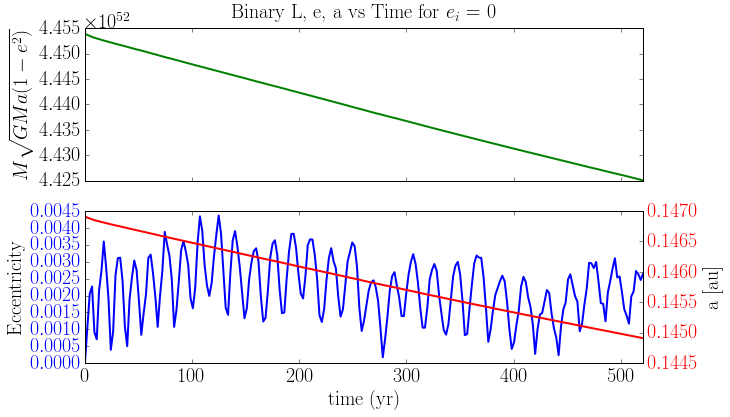

In [59]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)

#Top axis
axarr[0].plot(time_long, L_lowEcc_long,color='green',linewidth=2)
axarr[0].set_title('Binary L, e, a vs Time for $e_i$ = 0',y=1.02)
axarr[0].set_ylabel('$M\sqrt{GMa(1-e^2)}$')
axarr[0].set_xlim(time_long[0],time_long[-1])

#Bottom axis, left scale
axarr[1].plot(time_long, e_lowEcc_long,color='blue',linewidth=2)
for tl in axarr[1].get_yticklabels():
    tl.set_color('blue')
axarr[1].set_xlabel('time (yr)')
axarr[1].set_ylabel('Eccentricity', color='black')
axarr[1].set_xlim(time_long[0],time_long[-1])


#Bottom axis, right scale
ax2 = axarr[1].twinx()
ax2.plot(time_long,a_lowEcc_long, 'r',linewidth=2)
ax2.set_ylabel('a [au]', color='black')
for tl in ax2.get_yticklabels():
    tl.set_color('red')
ax2.set_xlim(time_long[0],time_long[-1])

#plt.savefig("25.09.2015.binALELowEccLong.pdf",bbox_inches='tight')